<a href="https://colab.research.google.com/github/Nadezda-Sut/EEG/blob/main/results_differences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых пакетов
!pip install xlsxwriter

from google.colab import drive
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# Монтирование Google Диска
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных из файла
data = pd.read_csv(file_path)

# Выбор переменных для анализа
variables = [
    'стаж использования интернета в учебных целях',
    'самооценка навыков использования компьютера',
    'самооценка навыков поиска информации',
    'количество запросов 1', 'количество просмотренных ссылок 1',
    'Интернет ответ', 'Интернет время', 'Возраст', 'Пол',
    'Time-test: Среднее 1 1',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)',
    'Time-test: Среднее время реакции, серия 2 (Часть 1)',
    'Time-test: Среднее время реакции, серия 2 (Часть 2)', 'Time-test: Проп 1 1',
    'Time-test: Количество пропусков, серия 1 (Часть 2)',
    'Time-test: Количество пропусков, серия 2 (Часть 1)',
    'Time-test: Количество пропусков, серия 2 (Часть 2)', 'Time-test: Ош 2 1',
    'Time-test: Количество ошибок, серия 2 (Часть 2)',
    'WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3',
    'WMem: Время серии 1', 'WMem: Время серии 2', 'WMem: Время серии 3',
    'Время фиксации на области интереса (тексте)', 'Среднее время фиксации', 'Все фиксации',
    'Modularity (Do_13-30)', 'Global Efficiency(Do_13-30)', 'Modularity(Posle_13-30)',
    'Global Efficiency(Posle_13-30)', 'Modularity(Do_8-12)', 'Global Efficiency(Do_8-12)',
    'Modularity(Posle_8-12)', 'Global Efficiency(Posle_8-12)'
]

# Разделение данных на группы по переменной 'Интернет ответ'
group0 = data[data['Интернет ответ'] == 0]
group1 = data[data['Интернет ответ'] == 1]

# Вычисление и сравнение статистик
results_list = []

for var in variables:
    if var in data.columns and var != 'Интернет ответ':
        # Проверка нормальности распределения с помощью теста Колмогорова-Смирнова
        ks_stat, ks_pvalue = ks_2samp(group0[var].dropna(), group1[var].dropna())
        normality = 'Нормальное' if ks_pvalue > 0.05 else 'Ненормальное'

        if normality == 'Нормальное':
            # Применение t-теста Стьюдента
            stat, pvalue = ttest_ind(group0[var].dropna(), group1[var].dropna())
            test_name = 't-тест Стьюдента'
        else:
            # Применение теста Манна-Уитни
            stat, pvalue = mannwhitneyu(group0[var].dropna(), group1[var].dropna())
            test_name = 'Тест Манна-Уитни'

        results_list.append({
            'Переменная': var,
            'Колмогоров-Смирнов стат': ks_stat,
            'Колмогоров-Смирнов p-значение': ks_pvalue,
            'Распределение': normality,
            'Тест': test_name,
            'Статистика теста': stat,
            'p-значение теста': pvalue
        })

results = pd.DataFrame(results_list)

# Путь для сохранения результата
output_excel_path = "/content/gdrive/My Drive/delite/beta/test_results.xlsx"

# Сохранение таблицы в файл Excel
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    results.to_excel(writer, sheet_name='Результаты', index=False, float_format='%.4f')

print(f"Файл сохранен по пути: {output_excel_path}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.0 MB/s eta 0:00:00
Mounted at /content/gdrive
Файл сохранен по пути: /content/gdrive/My Drive/delite/beta/test_results.xlsx


Mounted at /content/gdrive


<ipython-input-54-5f3e77e959c4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Задание выполнено', y='Стаж исп. Интернета в уч. целях', data=data, ax=axs[0, 0], palette="muted")
<ipython-input-54-5f3e77e959c4>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(['Задание не выполнено', 'Задание выполнено'])
<ipython-input-54-5f3e77e959c4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Задание выполнено', y='Самооценка навыков поиска информации', data=data, ax=axs[0, 1], palette="muted")
<ipython-input-54-5f3e77e959c4>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xtickl

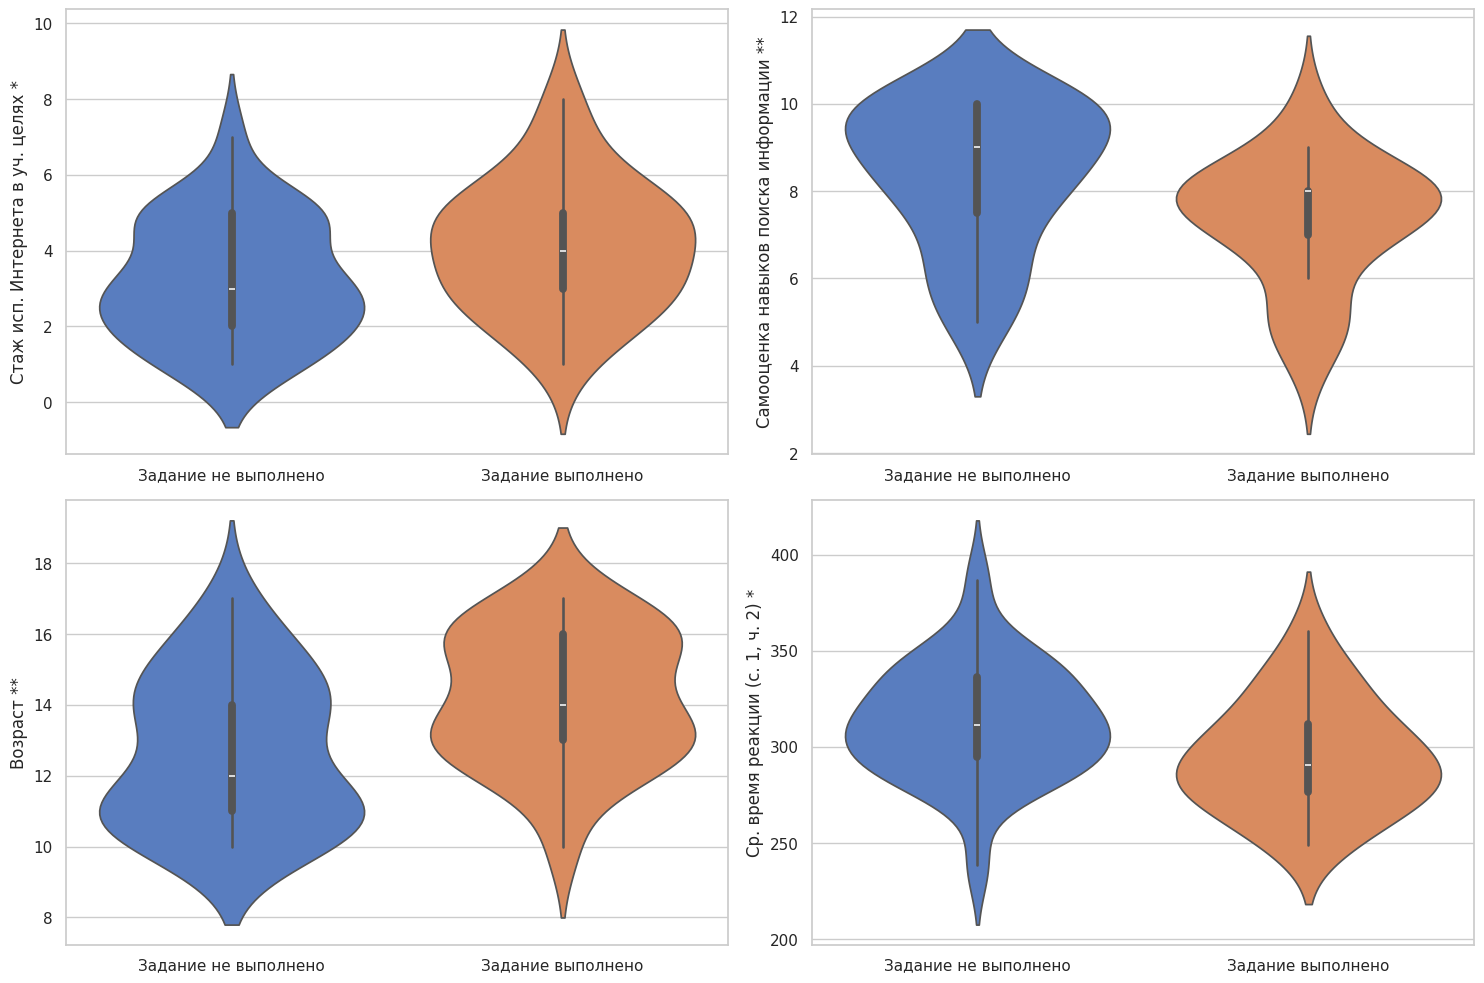

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Переименование столбцов для удобства
data.rename(columns={
    'Интернет ответ': 'Задание выполнено',
    'стаж использования интернета в учебных целях': 'Стаж исп. Интернета в уч. целях',
    'самооценка навыков поиска информации': 'Самооценка навыков поиска информации',
    'Возраст': 'Возраст',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)': 'Ср. время реакции (с. 1, ч. 2)'
}, inplace=True)

# Настройка графиков
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Стаж исп. Интернета в уч. целях
sns.violinplot(x='Задание выполнено', y='Стаж исп. Интернета в уч. целях', data=data, ax=axs[0, 0], palette="muted")
axs[0, 0].set_ylabel('Стаж исп. Интернета в уч. целях *')
axs[0, 0].set_xticklabels(['Задание не выполнено', 'Задание выполнено'])
axs[0, 0].set_xlabel('')

# График 2: Самооценка навыков поиска информации
sns.violinplot(x='Задание выполнено', y='Самооценка навыков поиска информации', data=data, ax=axs[0, 1], palette="muted")
axs[0, 1].set_ylabel('Самооценка навыков поиска информации **')
axs[0, 1].set_xticklabels(['Задание не выполнено', 'Задание выполнено'])
axs[0, 1].set_xlabel('')

# График 3: Возраст
sns.violinplot(x='Задание выполнено', y='Возраст', data=data, ax=axs[1, 0], palette="muted")
axs[1, 0].set_ylabel('Возраст **')
axs[1, 0].set_xticklabels(['Задание не выполнено', 'Задание выполнено'])
axs[1, 0].set_xlabel('')

# График 4: Ср. время реакции (с. 1, ч. 2)
sns.violinplot(x='Задание выполнено', y='Ср. время реакции (с. 1, ч. 2)', data=data, ax=axs[1, 1], palette="muted")
axs[1, 1].set_ylabel('Ср. время реакции (с. 1, ч. 2) *')
axs[1, 1].set_xticklabels(['Задание не выполнено', 'Задание выполнено'])
axs[1, 1].set_xlabel('')

# Подстройка макета
plt.tight_layout()
plt.show()


In [28]:
# Установка необходимых пакетов
!pip install xlsxwriter

from google.colab import drive
import pandas as pd
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu

# Монтирование Google Диска
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных из файла
data = pd.read_csv(file_path)

# Выбор переменных для анализа
variables = [
    'стаж использования интернета в учебных целях',
    'самооценка навыков использования компьютера',
    'самооценка навыков поиска информации',
    'количество запросов 1', 'количество просмотренных ссылок 1',
    'Интернет ответ', 'Интернет время', 'Возраст', 'Пол',
    'Time-test: Среднее 1 1',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)',
    'Time-test: Среднее время реакции, серия 2 (Часть 1)',
    'Time-test: Среднее время реакции, серия 2 (Часть 2)', 'Time-test: Проп 1 1',
    'Time-test: Количество пропусков, серия 1 (Часть 2)',
    'Time-test: Количество пропусков, серия 2 (Часть 1)',
    'Time-test: Количество пропусков, серия 2 (Часть 2)', 'Time-test: Ош 2 1',
    'Time-test: Количество ошибок, серия 2 (Часть 2)',
    'WMem: Количество объектов, серия 1', 'WMem: Количество объектов, серия 2', 'WMem: Количество объектов, серия 3',
    'WMem: Время серии 1', 'WMem: Время серии 2', 'WMem: Время серии 3',
    'Время фиксации на области интереса (тексте)', 'Среднее время фиксации', 'Все фиксации',
    'Modularity (Do_13-30)', 'Global Efficiency(Do_13-30)', 'Modularity(Posle_13-30)',
    'Global Efficiency(Posle_13-30)', 'Modularity(Do_8-12)', 'Global Efficiency(Do_8-12)',
    'Modularity(Posle_8-12)', 'Global Efficiency(Posle_8-12)'
]

# Разделение данных на группы по переменной 'количество просмотренных ссылок 1'
group_one_link = data[data['количество просмотренных ссылок 1'] == 1]
group_more_than_one_link = data[data['количество просмотренных ссылок 1'] != 1]

# Вычисление и сравнение статистик
results_list = []

for var in variables:
    if var in data.columns and var != 'количество просмотренных ссылок 1':
        # Проверка нормальности распределения с помощью теста Колмогорова-Смирнова
        ks_stat, ks_pvalue = ks_2samp(group_one_link[var].dropna(), group_more_than_one_link[var].dropna())
        normality = 'Нормальное' if ks_pvalue > 0.05 else 'Ненормальное'

        if normality == 'Нормальное':
            # Применение t-теста Стьюдента
            stat, pvalue = ttest_ind(group_one_link[var].dropna(), group_more_than_one_link[var].dropna())
            test_name = 't-тест Стьюдента'
        else:
            # Применение теста Манна-Уитни
            stat, pvalue = mannwhitneyu(group_one_link[var].dropna(), group_more_than_one_link[var].dropna())
            test_name = 'Тест Манна-Уитни'

        results_list.append({
            'Переменная': var,
            'Колмогоров-Смирнов стат': ks_stat,
            'Колмогоров-Смирнов p-значение': ks_pvalue,
            'Распределение': normality,
            'Тест': test_name,
            'Статистика теста': stat,
            'p-значение теста': pvalue
        })

results = pd.DataFrame(results_list)

# Путь для сохранения результата
output_excel_path = "/content/gdrive/My Drive/delite/beta/test_results.xlsx"

# Сохранение таблицы в файл Excel
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    results.to_excel(writer, sheet_name='Результаты', index=False, float_format='%.4f')

print(f"Файл сохранен по пути: {output_excel_path}")


Mounted at /content/gdrive
Файл сохранен по пути: /content/gdrive/My Drive/delite/beta/test_results.xlsx


Mounted at /content/gdrive


<ipython-input-53-dc3016ea12f9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Группа', y='Время выполнения задания', data=data, palette="muted")


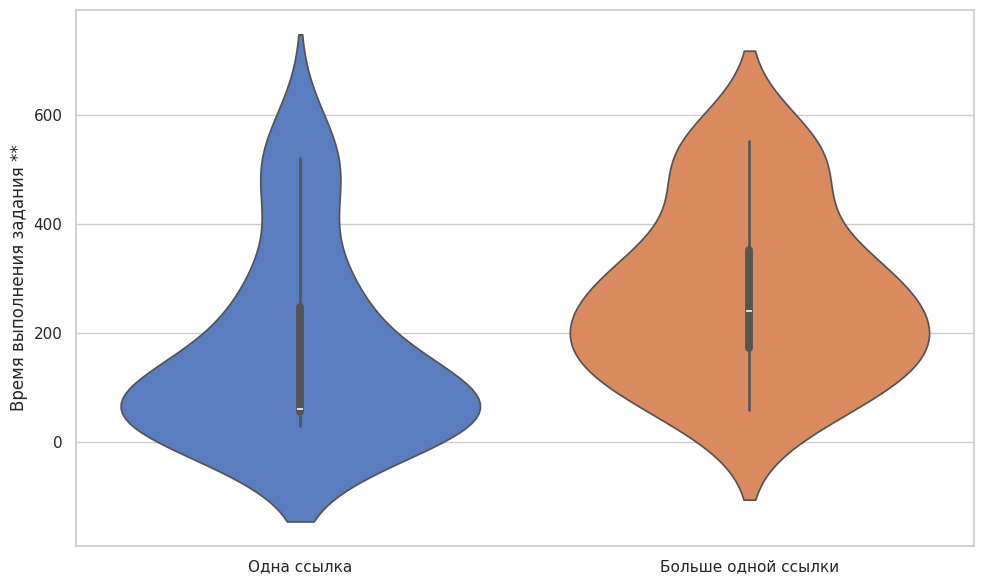

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Переименование столбцов для удобства
data.rename(columns={
    'Интернет ответ': 'Задание выполнено',
    'стаж использования интернета в учебных целях': 'Стаж исп. Интернета в уч. целях',
    'самооценка навыков поиска информации': 'Самооценка навыков поиска информации',
    'Возраст': 'Возраст',
    'Time-test: Среднее время реакции, серия 1 (Часть 2)': 'Ср. время реакции (с. 1, ч. 2)',
    'Интернет время': 'Время выполнения задания',
    'количество просмотренных ссылок 1': 'Количество просмотренных ссылок'
}, inplace=True)

# Разделение данных на группы
data['Группа'] = data['Количество просмотренных ссылок'].apply(lambda x: 'Одна ссылка' if x == 1 else 'Больше одной ссылки')

# Настройка графика
plt.figure(figsize=(10, 6))
sns.violinplot(x='Группа', y='Время выполнения задания', data=data, palette="muted")
plt.ylabel('Время выполнения задания **')
plt.xlabel('')
#plt.title('Распределение времени выполнения задания в зависимости от количества просмотренных ссылок')
plt.tight_layout()
plt.show()


Mounted at /content/gdrive
Хи-квадрат статистика: 4.980798203510519
p-значение: 0.025630155161551944
Степени свободы: 1


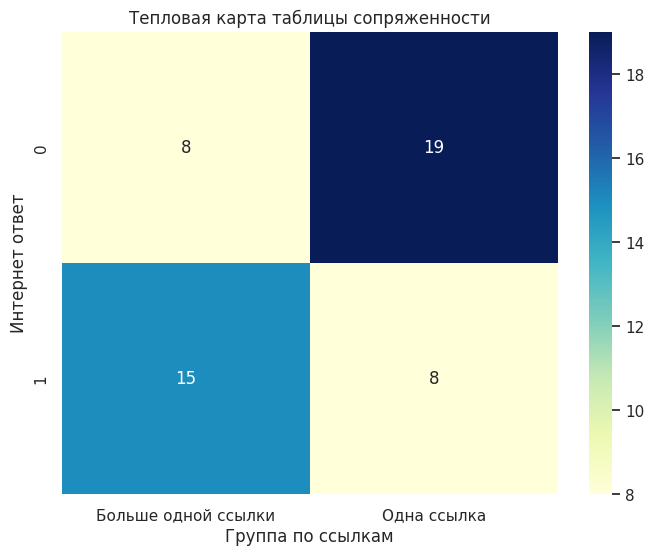

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Создание новой колонки для группировки по количеству просмотренных ссылок
data['Группа по ссылкам'] = data['количество просмотренных ссылок 1'].apply(lambda x: 'Одна ссылка' if x == 1 else 'Больше одной ссылки')

# Создание таблицы сопряженности
contingency_table = pd.crosstab(data['Интернет ответ'], data['Группа по ссылкам'])

# Выполнение хи-квадрат теста
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Вывод результатов теста
print(f'Хи-квадрат статистика: {chi2}')
print(f'p-значение: {p}')
print(f'Степени свободы: {dof}')

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Тепловая карта таблицы сопряженности')
plt.xlabel('Группа по ссылкам')
plt.ylabel('Интернет ответ')
plt.show()


Mounted at /content/gdrive


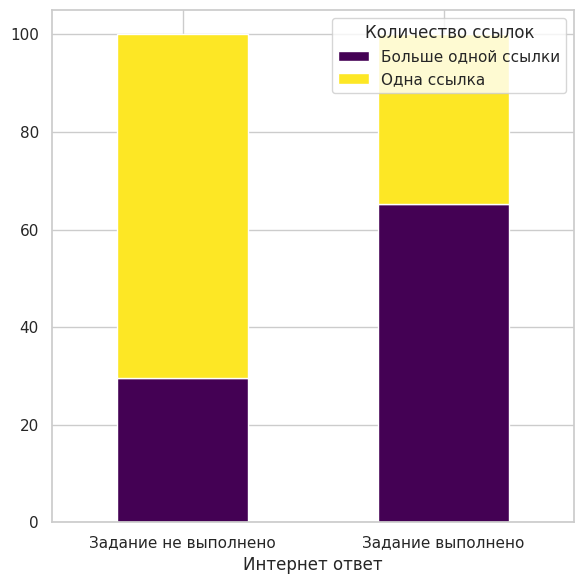

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Создание новой колонки для группировки по количеству просмотренных ссылок
data['Группа по ссылкам'] = data['количество просмотренных ссылок 1'].apply(lambda x: 'Одна ссылка' if x == 1 else 'Больше одной ссылки')

# Создание таблицы сопряженности
contingency_table = pd.crosstab(data['Интернет ответ'], data['Группа по ссылкам'], normalize='index') * 100

# Построение сложенной столбчатой диаграммы
contingency_table.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='viridis')
#plt.title('Сложенная столбчатая диаграмма')
plt.xlabel('Интернет ответ')
#plt.ylabel('Частота')
plt.xticks(ticks=[0, 1], labels=['Задание не выполнено', 'Задание выполнено'], rotation=0)
plt.legend(title='Количество ссылок')
plt.tight_layout()
plt.show()


Mounted at /content/gdrive


<Figure size 1000x600 with 0 Axes>

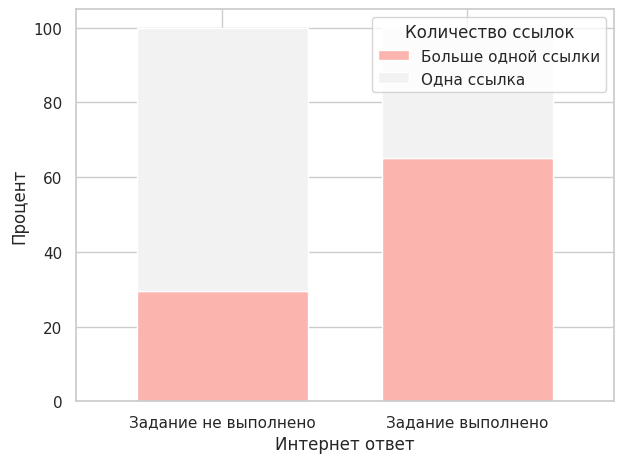

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Создание новой колонки для группировки по количеству просмотренных ссылок
data['Группа по ссылкам'] = data['количество просмотренных ссылок 1'].apply(lambda x: 'Одна ссылка' if x == 1 else 'Больше одной ссылки')

# Создание таблицы сопряженности
contingency_table = pd.crosstab(data['Интернет ответ'], data['Группа по ссылкам'], normalize='index') * 100

# Построение сложенной столбчатой диаграммы
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='Pastel1', width=0.7)
plt.xlabel('Интернет ответ')
plt.ylabel('Процент')
plt.xticks(ticks=[0, 1], labels=['Задание не выполнено', 'Задание выполнено'], rotation=0)
plt.legend(title='Количество ссылок')
plt.tight_layout()
plt.show()


Mounted at /content/gdrive


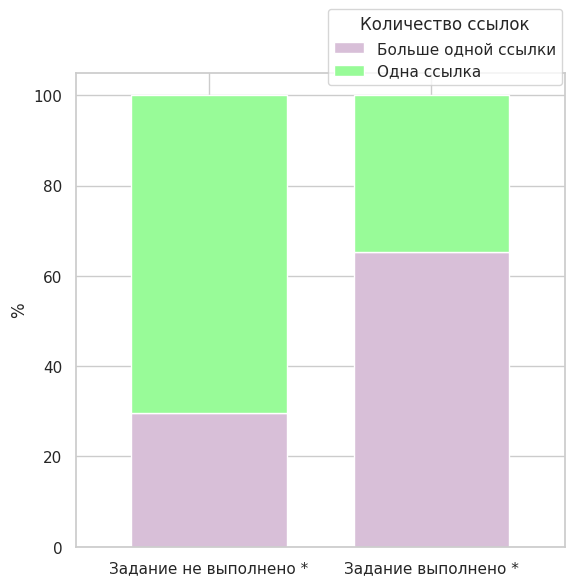

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Монтирование Google Диска
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Путь к файлу на Google Диске
file_path = "/content/gdrive/My Drive/delite/beta/EEGrequests (1).csv"

# Загрузка данных
data = pd.read_csv(file_path)

# Создание новой колонки для группировки по количеству просмотренных ссылок
data['Группа по ссылкам'] = data['количество просмотренных ссылок 1'].apply(lambda x: 'Одна ссылка' if x == 1 else 'Больше одной ссылки')

# Создание таблицы сопряженности
contingency_table = pd.crosstab(data['Интернет ответ'], data['Группа по ссылкам'], normalize='index') * 100

# Цветовая палитра для графика
colors = ['#D8BFD8', '#98FB98']  # светло-фиолетовый и нежно-мятный

# Построение сложенной столбчатой диаграммы
fig, ax = plt.subplots(figsize=(6, 6))
contingency_table.plot(kind='bar', stacked=True, color=colors, width=0.7, ax=ax)

plt.xlabel('')
plt.ylabel('%')
plt.xticks(ticks=[0, 1], labels=['Задание не выполнено *', 'Задание выполнено *'], rotation=0)
plt.legend(title='Количество ссылок', loc='upper left', bbox_to_anchor=(0.5, 1.15), ncol=1)
plt.tight_layout()
plt.show()
